In [1]:
import pandas as pd

In [5]:
#data taken from kaggle which calculates an automatic bicycle counter

In [4]:
data = pd.read_csv("fremont-bridge.csv", index_col= 'Date', parse_dates=True)
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [6]:
#combining the counter values of both directions

In [7]:
data.columns = ["West", "East"]
data["Total"] = data["West"] + data["East"] 
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [8]:
#descriptive analysis

In [9]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [10]:
#preparing some visualisations

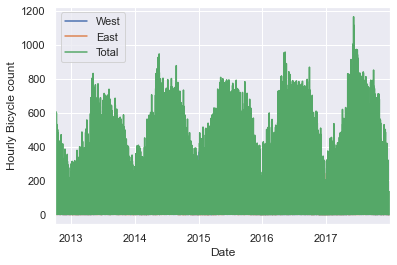

In [11]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

In [14]:
#resampling data to observe better seasonality

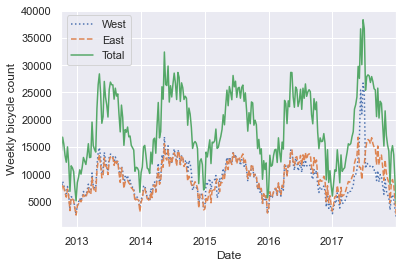

In [13]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

In [15]:
'''Above Trend shows people cycling for more hours towards the first half of the year than in the second half. Give the data comes from Seattle, summer months show higher cycling hours'''

'Above Trend shows people cycling for more hours towards the first half of the year than in the second half. Give the data comes from Seattle, summer months show higher cycling hours'

In [17]:
#aggregating data using rolling mean -- a 30-day rolling mean

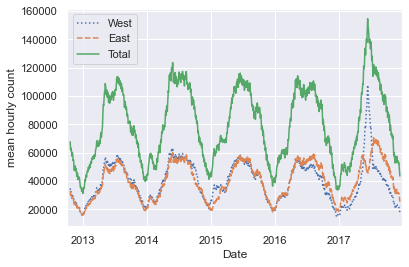

In [18]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

In [19]:
'''Above plots shows quite uneven results and jaggedness. This indicates to use other methods to understand the hourly count vs time series data'''

'Above plots shows quite uneven results and jaggedness. This indicates to use other methods to understand the hourly count vs time series data'

In [22]:
#Usign Gaussian fucntion for a smoother window with the same rolling mean

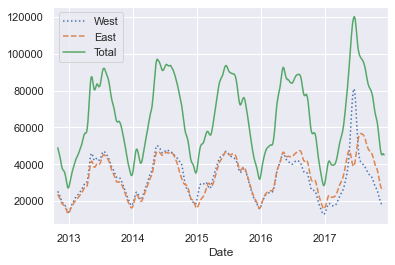

In [21]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

Looking at other Data Trends

In [23]:
#Observing average traffic at a time of the day

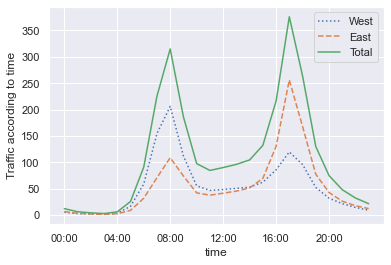

In [24]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()

In [25]:
'''What we observe is people cycle most in the morning hours before 8 AM and evening hours after 4:30 PM until 8 PM'''

'What we observe is people cycle most in the morning hours before 8 AM and evening hours after 4:30 PM until 8 PM'